# 0. Importing

In [1]:
import pandas as pd
import seaborn as sns
from pandas_profiling import ProfileReport
import matplotlib.pyplot as plt


# 1. Understanding the data

I got the data from https://www.kaggle.com/kyanyoga/sample-sales-data

In [2]:
df = pd.read_csv(r'https://raw.githubusercontent.com/Canerhan/data-analytics-with-Pandas-Hvplot/main/Sales.csv',encoding='latin1', sep=',', error_bad_lines=False)

Pandas profiling is VERY powerful. \
It helps you to understand the data, each column and gives good advice like for correlations.

In [3]:
profile = ProfileReport(df, title="Pandas Profiling Report")
profile.to_notebook_iframe()

In [4]:
# To get the type for each column, you can use:
df.dtypes

ORDERNUMBER           int64
QUANTITYORDERED       int64
PRICEEACH           float64
ORDERLINENUMBER       int64
SALES               float64
ORDERDATE            object
STATUS               object
QTR_ID                int64
MONTH_ID              int64
YEAR_ID               int64
PRODUCTLINE          object
MSRP                  int64
PRODUCTCODE          object
CUSTOMERNAME         object
PHONE                object
ADDRESSLINE1         object
ADDRESSLINE2         object
CITY                 object
STATE                object
POSTALCODE           object
COUNTRY              object
TERRITORY            object
CONTACTLASTNAME      object
CONTACTFIRSTNAME     object
DEALSIZE             object
dtype: object

---
The informations about the date are extracted. \
We have QTR_ID for the quarter, Month_ID and YEAR_ID.

---
# 2. Cleaning the data

In [5]:
# If you want to see all columns of the data, you should set:
pd.set_option('display.max_columns',200)
df.head(20)

ORDERNUMBER  QUANTITYORDERED  PRICEEACH  ORDERLINENUMBER    SALES  \
0         10107               30      95.70                2  2871.00   
1         10121               34      81.35                5  2765.90   
2         10134               41      94.74                2  3884.34   
3         10145               45      83.26                6  3746.70   
4         10159               49     100.00               14  5205.27   
5         10168               36      96.66                1  3479.76   
6         10180               29      86.13                9  2497.77   
7         10188               48     100.00                1  5512.32   
8         10201               22      98.57                2  2168.54   
9         10211               41     100.00               14  4708.44   
10        10223               37     100.00                1  3965.66   
11        10237               23     100.00                7  2333.12   
12        10251               28     100.00                2  3188.64   
13        10263               34     100.00                2  3676.76   
14        10275               45      92.83                1  4177.35   
15        10285               36     100.00                6  4099.68   
16        10299               23     100.00                9  2597.39   
17        10309               41     100.00                5  4394.38   
18        10318               46      94.74                1  4358.04   
19        10329               42     100.00                1  4396.14   

          ORDERDATE   STATUS  QTR_ID  MONTH_ID  YEAR_ID  PRODUCTLINE  MSRP  \
0    2/24/2003 0:00  Shipped       1         2     2003  Motorcycles    95   
1     5/7/2003 0:00  Shipped       2         5     2003  Motorcycles    95   
2     7/1/2003 0:00  Shipped       3         7     2003  Motorcycles    95   
3    8/25/2003 0:00  Shipped       3         8     2003  Motorcycles    95   
4   10/10/2003 0:00  Shipped       4        10     2003  Motorcycles    95   
5   10/28/2003 0:00  Shipped       4        10     2003  Motorcycles    95   
6   11/11/2003 0:00  Shipped       4        11     2003  Motorcycles    95   
7   11/18/2003 0:00  Shipped       4        11     2003  Motorcycles    95   
8    12/1/2003 0:00  Shipped       4        12     2003  Motorcycles    95   
9    1/15/2004 0:00  Shipped       1         1     2004  Motorcycles    95   
10   2/20/2004 0:00  Shipped       1         2     2004  Motorcycles    95   
11    4/5/2004 0:00  Shipped       2         4     2004  Motorcycles    95   
12   5/18/2004 0:00  Shipped       2         5     2004  Motorcycles    95   
13   6/28/2004 0:00  Shipped       2         6     2004  Motorcycles    95   
14   7/23/2004 0:00  Shipped       3         7     2004  Motorcycles    95   
15   8/27/2004 0:00  Shipped       3         8     2004  Motorcycles    95   
16   9/30/2004 0:00  Shipped       3         9     2004  Motorcycles    95   
17  10/15/2004 0:00  Shipped       4        10     2004  Motorcycles    95   
18   11/2/2004 0:00  Shipped       4        11     2004  Motorcycles    95   
19  11/15/2004 0:00  Shipped       4        11     2004  Motorcycles    95   

   PRODUCTCODE                CUSTOMERNAME             PHONE  \
0     S10_1678           Land of Toys Inc.        2125557818   
1     S10_1678          Reims Collectables        26.47.1555   
2     S10_1678             Lyon Souveniers  +33 1 46 62 7555   
3     S10_1678           Toys4GrownUps.com        6265557265   
4     S10_1678    Corporate Gift Ideas Co.        6505551386   
5     S10_1678        Technics Stores Inc.        6505556809   
6     S10_1678    Daedalus Designs Imports        20.16.1555   
7     S10_1678                Herkku Gifts     +47 2267 3215   
8     S10_1678             Mini Wheels Co.        6505555787   
9     S10_1678            Auto Canal Petit    (1) 47.55.6555   
10    S10_1678  Australian Collectors, Co.      03 9520 4555   
11    S10_1678             Vitachrome Inc.        2125551500   

In [6]:
df.dtypes

ORDERNUMBER           int64
QUANTITYORDERED       int64
PRICEEACH           float64
ORDERLINENUMBER       int64
SALES               float64
ORDERDATE            object
STATUS               object
QTR_ID                int64
MONTH_ID              int64
YEAR_ID               int64
PRODUCTLINE          object
MSRP                  int64
PRODUCTCODE          object
CUSTOMERNAME         object
PHONE                object
ADDRESSLINE1         object
ADDRESSLINE2         object
CITY                 object
STATE                object
POSTALCODE           object
COUNTRY              object
TERRITORY            object
CONTACTLASTNAME      object
CONTACTFIRSTNAME     object
DEALSIZE             object
dtype: object

As you can see, the columne 'ORDERDATE' has the type object.
We need to fix that.

In [7]:
df['ORDERDATE'] = pd.to_datetime(df['ORDERDATE'])

In [8]:
df.dtypes

ORDERNUMBER                  int64
QUANTITYORDERED              int64
PRICEEACH                  float64
ORDERLINENUMBER              int64
SALES                      float64
ORDERDATE           datetime64[ns]
STATUS                      object
QTR_ID                       int64
MONTH_ID                     int64
YEAR_ID                      int64
PRODUCTLINE                 object
MSRP                         int64
PRODUCTCODE                 object
CUSTOMERNAME                object
PHONE                       object
ADDRESSLINE1                object
ADDRESSLINE2                object
CITY                        object
STATE                       object
POSTALCODE                  object
COUNTRY                     object
TERRITORY                   object
CONTACTLASTNAME             object
CONTACTFIRSTNAME            object
DEALSIZE                    object
dtype: object

---
# 3. Analyzing

## 3.1 Intro

---
We want to look depper in the data based on the year. \
We will group the Dataframe by the Year_ID column, \
and will use the 'describe' function.

In [9]:
df.groupby(by=['YEAR_ID']).describe()

ORDERNUMBER                                                       \
              count          mean        std      min       25%      50%   
YEAR_ID                                                                    
2003         1000.0  10158.099000  38.399840  10100.0  10127.00  10159.0   
2004         1345.0  10286.069888  44.275865  10208.0  10248.00  10287.0   
2005          478.0  10392.297071  18.456352  10362.0  10375.25  10390.0   

                          QUANTITYORDERED                                    \
             75%      max           count       mean        std   min   25%   
YEAR_ID                                                                       
2003     10182.0  10302.0          1000.0  34.612000   9.111228  20.0  27.0   
2004     10324.0  10361.0          1345.0  34.813383   8.969532  20.0  27.0   
2005     10410.5  10425.0           478.0  36.884937  12.527929   6.0  28.0   

                          PRICEEACH                                        \
          50%   75%   max     count       mean        std    min      25%   
YEAR_ID                                                                     
2003     34.0  43.0  50.0    1000.0  83.793140  20.293152  27.22  69.7550   
2004     35.0  42.0  55.0    1345.0  83.634275  20.035246  28.88  68.8000   
2005     36.0  45.0  97.0     478.0  83.445251  20.354340  26.88  67.2525   

                             ORDERLINENUMBER                                \
           50%    75%    max           count      mean       std  min  25%   
YEAR_ID                                                                      
2003     96.34  100.0  100.0          1000.0  6.709000  4.351236  1.0  3.0   
2004     95.20  100.0  100.0          1345.0  6.460967  4.186696  1.0  3.0   
2005     95.19  100.0  100.0           478.0  5.972803  4.029932  1.0  3.0   

                           SALES                                              \
         50%   75%   max   count         mean          std     min       25%   
YEAR_ID                                                                        
2003     6.0  10.0  18.0  1000.0  3516.979540  1763.679136  710.20  2173.935   
2004     6.0   9.0  18.0  1345.0  3512.388550  1775.284571  577.60  2220.720   
2005     5.0   9.0  18.0   478.0  3747.880146  2151.798783  482.13  2158.900   

                                       QTR_ID                                \
              50%        75%      max   count      mean       std  min  25%   
YEAR_ID                                                                       
2003     3210.095  4483.4475  11279.2  1000.0  3.102000  1.093980  1.0  2.0   
2004     3141.570  4417.3800  12536.5  1345.0  2.911524  1.129446  1.0  2.0   
2005     3316.815  4846.5250  14082.8   478.0  1.368201  0.482822  1.0  1.0   

                       MONTH_ID                                             \
         50%  75%  max    count      mean       std  min  25%   50%    75%   
YEAR_ID                                                                      
2003     4.0  4.0  4.0   1000.0  8.243000  3.280963  1.0  6.0  10.0  11.00   
2004     3.0  4.0  4.0   1345.0  7.690706  3.466177  1.0  5.0   8.0  11.00   
2005     1.0  2.0  2.0    478.0  3.002092  1.468751  1.0  2.0   3.0   4.75   

                 MSRP                                                         
          max   count        mean        std   min   25%   50%    75%    max  
YEAR_ID                                                                       
2003     12.0  1000.0  101.589000  40.589131  33.0  68.0  99.0  127.0  214.0  
2004     12.0  1345.0  100.260967  39.870115  33.0  68.0  97.0  122.0  214.0  
2005      5.0   478.0  100.167364  40.288546  33.0  68.0  97.0  124.0  214.0

In [10]:
# If you only want to specifically see only one column by the describe function \
# for example the MONTH_ID use: 
df.groupby(by=['YEAR_ID'])['MONTH_ID'].describe()

count      mean       std  min  25%   50%    75%   max
YEAR_ID                                                         
2003     1000.0  8.243000  3.280963  1.0  6.0  10.0  11.00  12.0
2004     1345.0  7.690706  3.466177  1.0  5.0   8.0  11.00  12.0
2005      478.0  3.002092  1.468751  1.0  2.0   3.0   4.75   5.0

## 3.2 Modify the Dataframe

---
We need to modify our dataframe.\
We want the country, year and the sum of sales per year \
So we have to group by COUNTRY and YEAR_ID and THEN sum the sales.

In [11]:
# If you want to see the sales per Year AND COUNTRY:
df2 = df.groupby(by=['COUNTRY', 'YEAR_ID'])['SALES'].sum()
df2.head(10)

COUNTRY    YEAR_ID
Australia  2003       253134.45
           2004       232396.68
           2005       145091.97
Austria    2003        82117.88
           2004        51694.39
           2005        68250.26
Belgium    2003         3348.46
           2004        80024.05
           2005        25040.11
Canada     2003        54609.50
Name: SALES, dtype: float64

The problem is, that in the second and third row the country-name is missing. \
We need to reset the index by adding ".reset_index()" to the GROUPBY function

In [12]:
df2 = df.groupby(by=['COUNTRY', 'YEAR_ID'])['SALES'].sum().reset_index()
df2.head(10)

COUNTRY  YEAR_ID      SALES
0  Australia     2003  253134.45
1  Australia     2004  232396.68
2  Australia     2005  145091.97
3    Austria     2003   82117.88
4    Austria     2004   51694.39
5    Austria     2005   68250.26
6    Belgium     2003    3348.46
7    Belgium     2004   80024.05
8    Belgium     2005   25040.11
9     Canada     2003   54609.50

## 3.3 Visualization

---
__We will use 'Catplot' from Seaborn__ \
The reason for this is described in the documentation: \
__"This function provides access to several axes-level functions that show the \
relationship between a numerical and one or more categorical variables \
using one of several visual representations. The kind parameter selects the underlying axes-level function to use:__

__Categorical scatterplots:__

- stripplot() (with __kind="strip"__; the default)

- swarmplot() (with __kind="swarm"__)

__Categorical distribution plots:__ \

- boxplot() (with __kind="box"__)

- violinplot() (with __kind="violin"__)

- boxenplot() (with __kind="boxen"__)

__Categorical estimate plots:__ \

- pointplot() (with __kind="point"__)

- barplot() (with __kind="bar"__)

- countplot() (with __kind="count"__)

https://seaborn.pydata.org/generated/seaborn.catplot.html

Instead of learning different fucntions,
we can use carplot and define the figure by the 'kind=' paramter

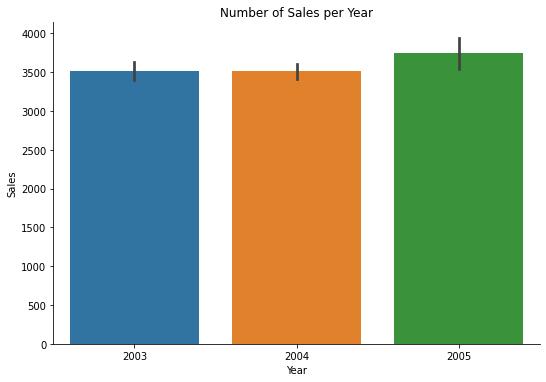

In [13]:
# As explained above, we will use caotplot
# We want a barplot, so kind is 'bar'
# For changing the size of the plot
# we use height and aspect.

bp = sns.catplot(data=df, kind='bar', x="YEAR_ID", y='SALES', height=5, aspect=1.5)
# --> Our visualisation has the name 'bp'!

# For the title of the visualisation, use:
bp.set(title='Number of Sales per Year')

# For labeling of the axis , use:
bp.set(xlabel='Year', ylabel='Sales')


---
Let's say, we want to see the __sales per year for each country.__ \
In the end we will have multiple plots. 


How many countries do we have in our data?

For getting the unique and number of unique elements in a column, \
we use __.unique()__  and __.nunique()__.

In [14]:
df['COUNTRY'].unique()

array(['USA', 'France', 'Norway', 'Australia', 'Finland', 'Austria', 'UK',
       'Spain', 'Sweden', 'Singapore', 'Canada', 'Japan', 'Italy',
       'Denmark', 'Belgium', 'Philippines', 'Germany', 'Switzerland',
       'Ireland'], dtype=object)

In [15]:
df['COUNTRY'].nunique()

19

Now we will creat multiple subplots for each country. \
The problem is, we have 19 countries. \
They will not fit in one row.


- We will use catplot again.
- We want to create multiple figures based on the 'COUNTRY' column
    - with the parameter 'col='COLUMN-NAME', you can specify,\
the column that will determine the faceting of the grid.
- With 'col_wrap=INTEGER" you can define the number of __figures per row.__

bp = sns.catplot(data=df, x="YEAR_ID", y="SALES", col="COUNTRY", col_wrap=3, kind='bar', height=5)


__we will use the modified datafram "df2"__

In [16]:
df2.head(10)

COUNTRY  YEAR_ID      SALES
0  Australia     2003  253134.45
1  Australia     2004  232396.68
2  Australia     2005  145091.97
3    Austria     2003   82117.88
4    Austria     2004   51694.39
5    Austria     2005   68250.26
6    Belgium     2003    3348.46
7    Belgium     2004   80024.05
8    Belgium     2005   25040.11
9     Canada     2003   54609.50

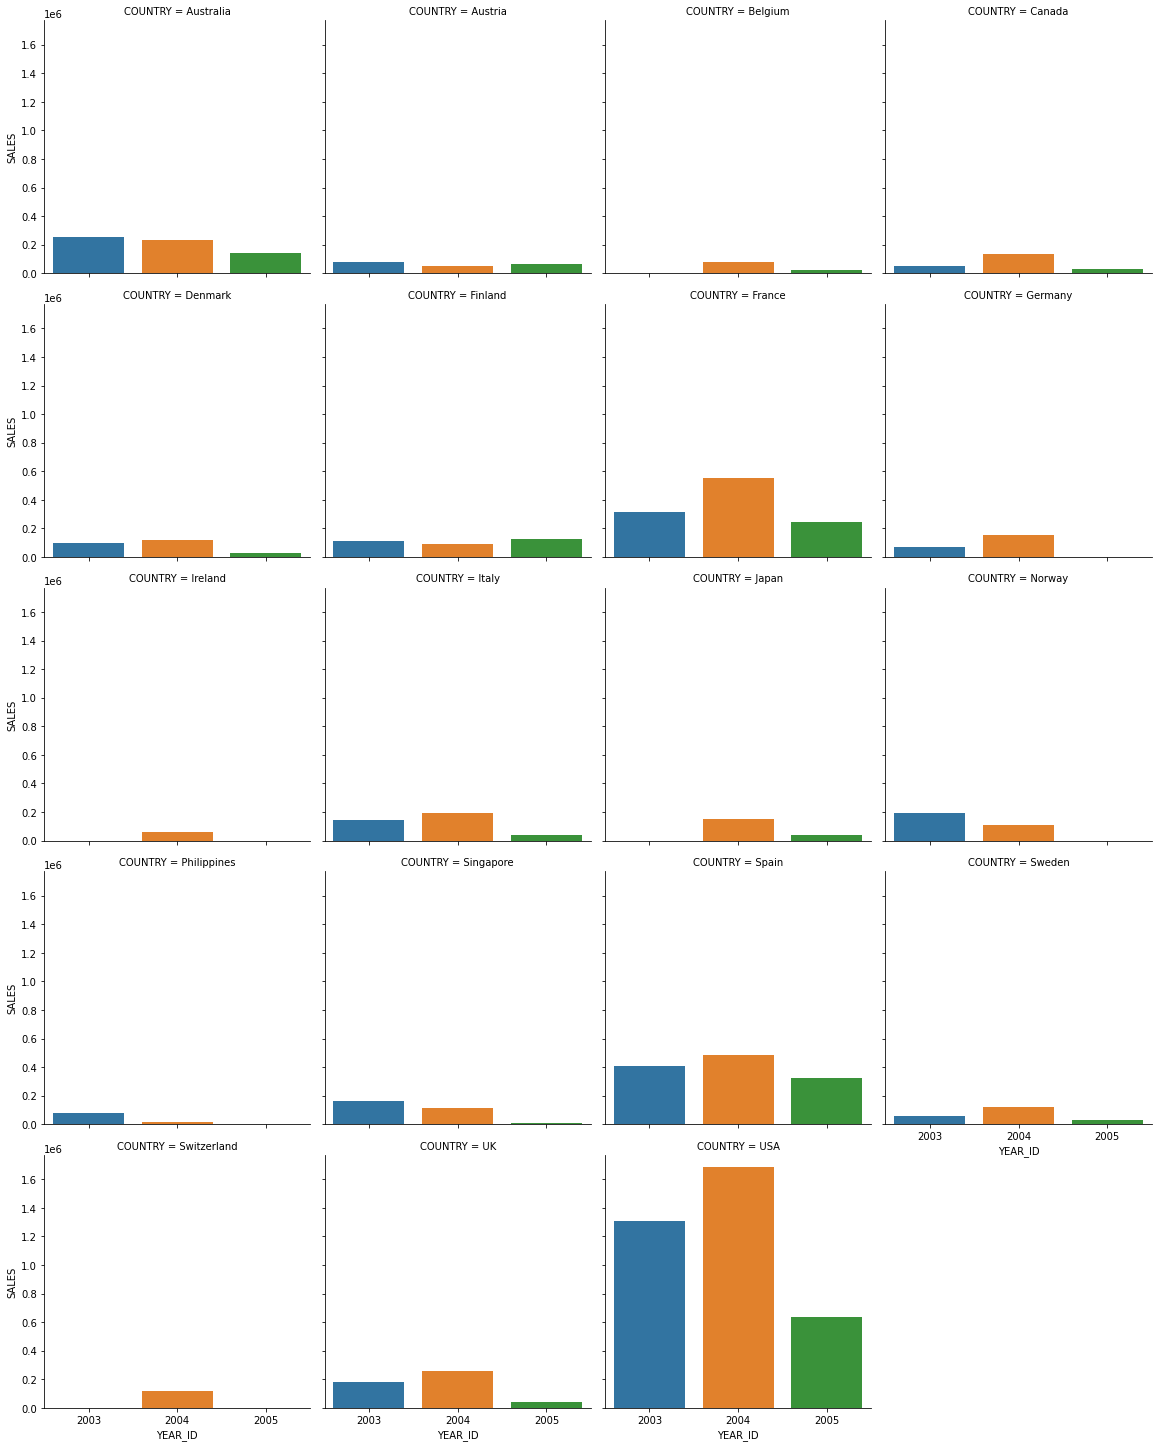

In [17]:
bp = sns.catplot(data=df2, x="YEAR_ID", y="SALES", col="COUNTRY", col_wrap=4, kind='bar', height=4)

__But there are some problems:__
1. I don't like it that there is always 'COUNTRY ='.
2. It has no title.
3. The y-axis has the same min, max for all plots. \
    Because of high sales of the USA, the yaxis doesn'make sense for the other countries.

We will fix that now.
- With the function you will get only the element-name without the column-name:\
bp.set_titles("{col_name}")

- With the suptitle we will have a Title at the top: \
bp.fig.suptitle('Grouping of Sales by Amount and Country', fontsize=30) \
plt.subplots_adjust(top=0.9)

- y-axis:\
The "sharey" parameter must be False.\
__By changing that, you can't compare the barplots directly!__

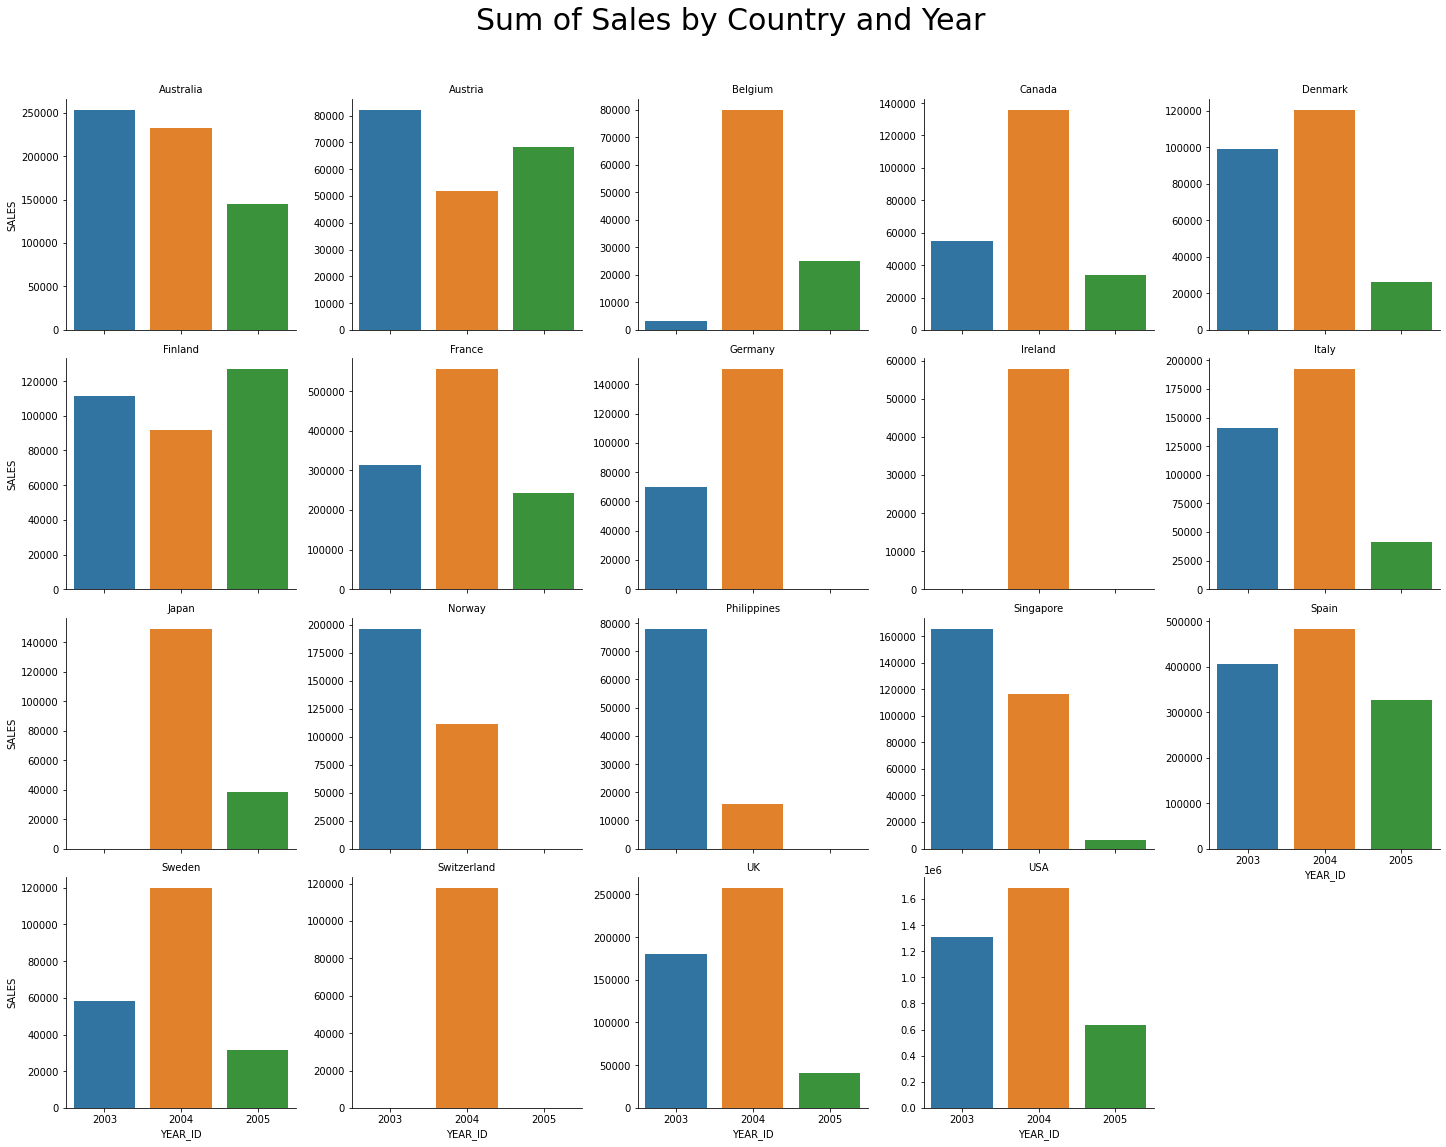

In [18]:
bp = sns.catplot(data=df2, x="YEAR_ID", y="SALES", col="COUNTRY", col_wrap=5, kind='bar', height=4, sharey=False)

bp.set_titles("{col_name}")

bp.fig.suptitle('Sum of Sales by Country and Year', fontsize=30)
plt.subplots_adjust(top=0.9)

__As i have already pointed out catplot is very great.__
- We can change the kind of the visualisation by just changing the "kind=" parameter. \
For example:\
If i want change the visualisation from above from barplot to stripplot, \
i only have to change the script above at the "kind" paramter to "kind='strip' and that's it.

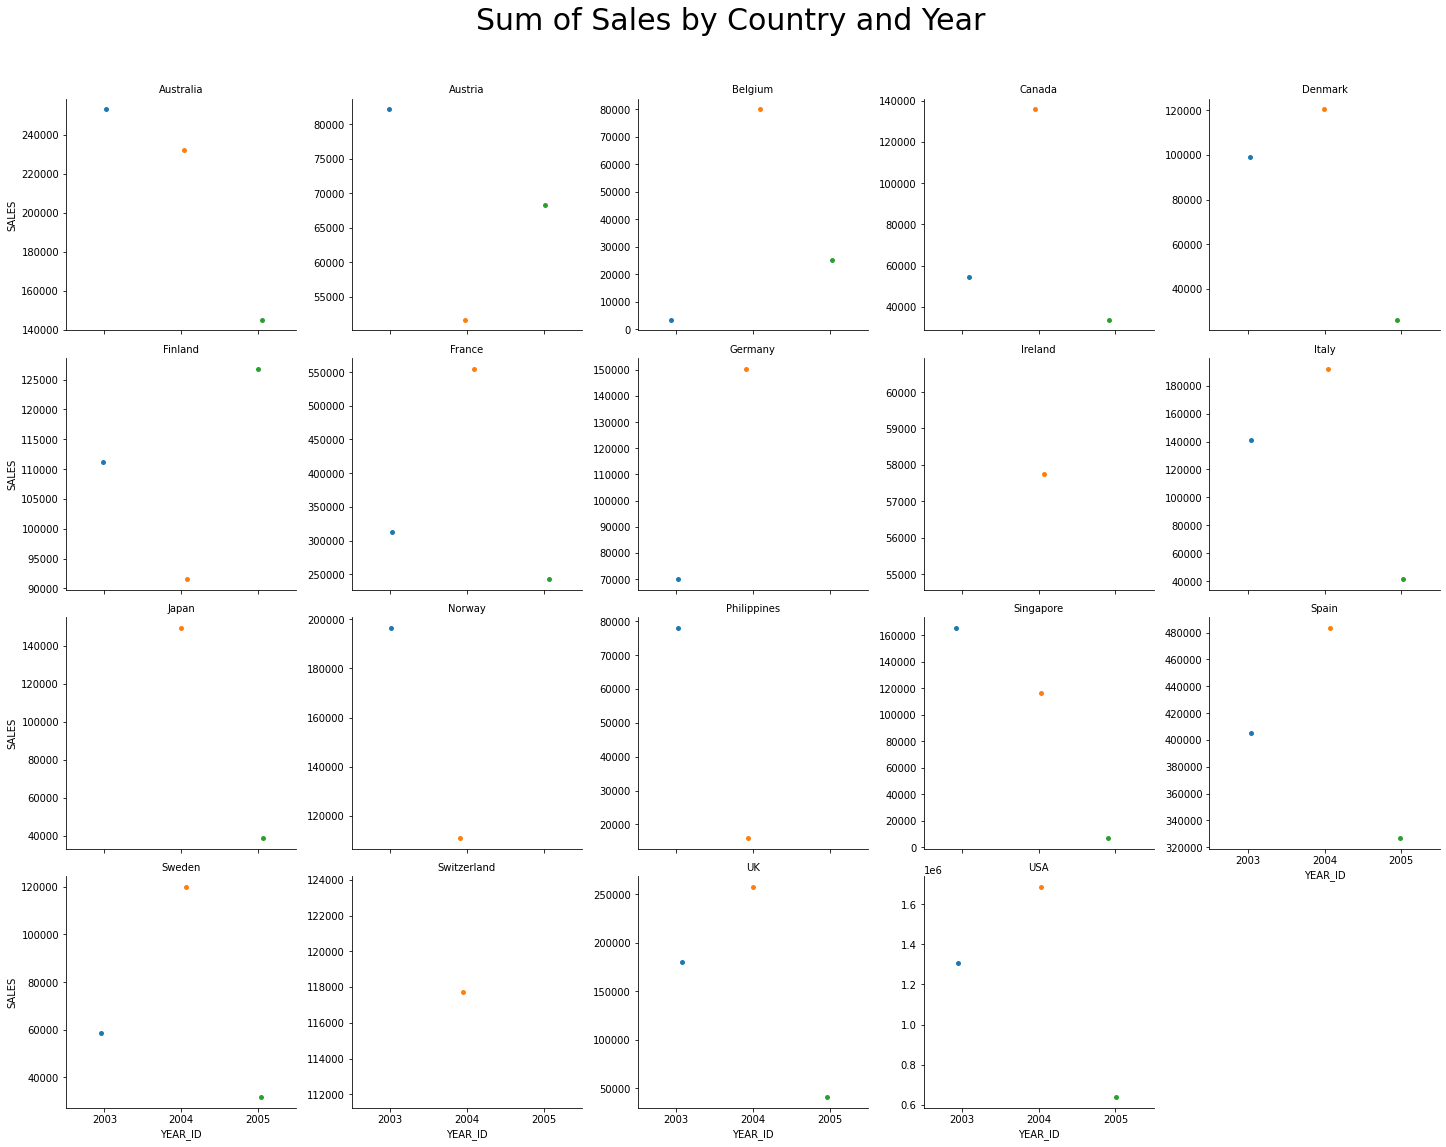

In [19]:
bp = sns.catplot(data=df2, x="YEAR_ID", y="SALES", col="COUNTRY", col_wrap=5, kind='strip', height=4, sharey=False)

bp.set_titles("{col_name}")

bp.fig.suptitle('Sum of Sales by Country and Year', fontsize=30)
plt.subplots_adjust(top=0.9)

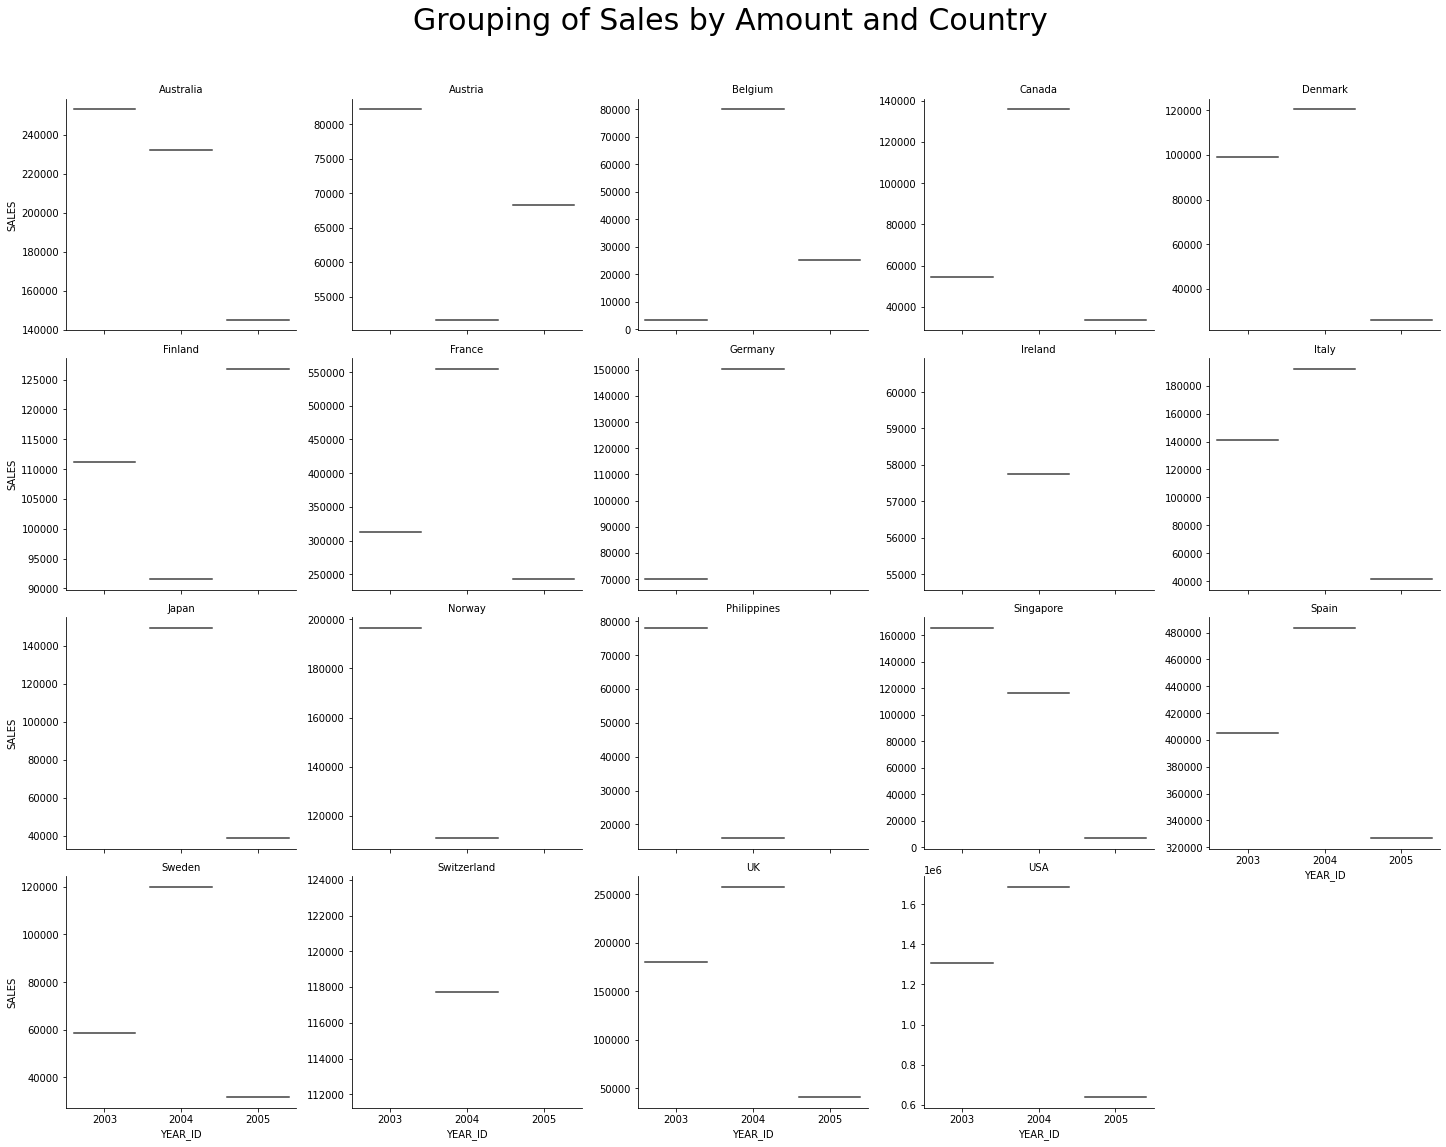

In [20]:
# kind = 'violin'
bp = sns.catplot(data=df2, x="YEAR_ID", y="SALES", col="COUNTRY", col_wrap=5, kind='violin', height=4, sharey=False)

bp.set_titles("{col_name}")

bp.fig.suptitle('Grouping of Sales by Amount and Country', fontsize=30)
plt.subplots_adjust(top=0.9)

## 3.2 The Hue-Parameter

---
The hue parameter is very powerful.\
We are plotting the data by the x and y Dimensions.\
When we define the hue parameter, \
we are breaking the data down in a third variable. \

With adding hue, \
the data will by displayed by __different colors.__

We can't use our df2.
Let's look back into df

In [21]:
df.head()

ORDERNUMBER  QUANTITYORDERED  PRICEEACH  ORDERLINENUMBER    SALES  \
0        10107               30      95.70                2  2871.00   
1        10121               34      81.35                5  2765.90   
2        10134               41      94.74                2  3884.34   
3        10145               45      83.26                6  3746.70   
4        10159               49     100.00               14  5205.27   

   ORDERDATE   STATUS  QTR_ID  MONTH_ID  YEAR_ID  PRODUCTLINE  MSRP  \
0 2003-02-24  Shipped       1         2     2003  Motorcycles    95   
1 2003-05-07  Shipped       2         5     2003  Motorcycles    95   
2 2003-07-01  Shipped       3         7     2003  Motorcycles    95   
3 2003-08-25  Shipped       3         8     2003  Motorcycles    95   
4 2003-10-10  Shipped       4        10     2003  Motorcycles    95   

  PRODUCTCODE              CUSTOMERNAME             PHONE  \
0    S10_1678         Land of Toys Inc.        2125557818   
1    S10_1678        Reims Collectables        26.47.1555   
2    S10_1678           Lyon Souveniers  +33 1 46 62 7555   
3    S10_1678         Toys4GrownUps.com        6265557265   
4    S10_1678  Corporate Gift Ideas Co.        6505551386   

                    ADDRESSLINE1 ADDRESSLINE2           CITY STATE POSTALCODE  \
0        897 Long Airport Avenue          NaN            NYC    NY      10022   
1             59 rue de l'Abbaye          NaN          Reims   NaN      51100   
2  27 rue du Colonel Pierre Avia          NaN          Paris   NaN      75508   
3             78934 Hillside Dr.          NaN       Pasadena    CA      90003   
4                7734 Strong St.          NaN  San Francisco    CA        NaN   

  COUNTRY TERRITORY CONTACTLASTNAME CONTACTFIRSTNAME DEALSIZE  
0     USA       NaN              Yu             Kwai    Small  
1  France      EMEA         Henriot             Paul    Small  
2  France      EMEA        Da Cunha           Daniel   Medium  
3     USA       NaN           Young            Julie   Medium  
4     USA       NaN           Brown            Julie   Medium

We have the column "PRODUCTLINE". \
We could break down the sales per Country, Year and Prdouct-Line.
We will create a new Datafram(df3)

In [22]:
df3 = df.groupby(by=['COUNTRY', 'YEAR_ID', 'PRODUCTLINE'])['SALES'].sum().reset_index()

In [23]:
df3.head(20)

COUNTRY  YEAR_ID       PRODUCTLINE     SALES
0   Australia     2003      Classic Cars  85388.64
1   Australia     2003       Motorcycles  42352.70
2   Australia     2003            Planes  22347.02
3   Australia     2003            Trains   1681.35
4   Australia     2003  Trucks and Buses  11297.54
5   Australia     2003      Vintage Cars  90067.20
6   Australia     2004      Classic Cars  76287.38
7   Australia     2004       Motorcycles  33123.97
8   Australia     2004            Planes  41425.07
9   Australia     2004             Ships   1089.36
10  Australia     2004  Trucks and Buses  36104.09
11  Australia     2004      Vintage Cars  44366.81
12  Australia     2005      Classic Cars  31409.52
13  Australia     2005       Motorcycles  14492.09
14  Australia     2005            Planes  11081.78
15  Australia     2005             Ships   3070.40
16  Australia     2005  Trucks and Buses  29916.87
17  Australia     2005      Vintage Cars  55121.31
18    Austria     2003      Classic Cars  26675.04
19    Austria     2003            Planes  14216.32

The new dataframe looks good.\
As noted, our third variable will be the column "PRODUCTLINE".\
We will use the know code from above, \
and will just add __hue='PRODUCTLINE'__.

For reducing the complexity, \
the plots per row will be reduced to 3 --> col_wrap=3

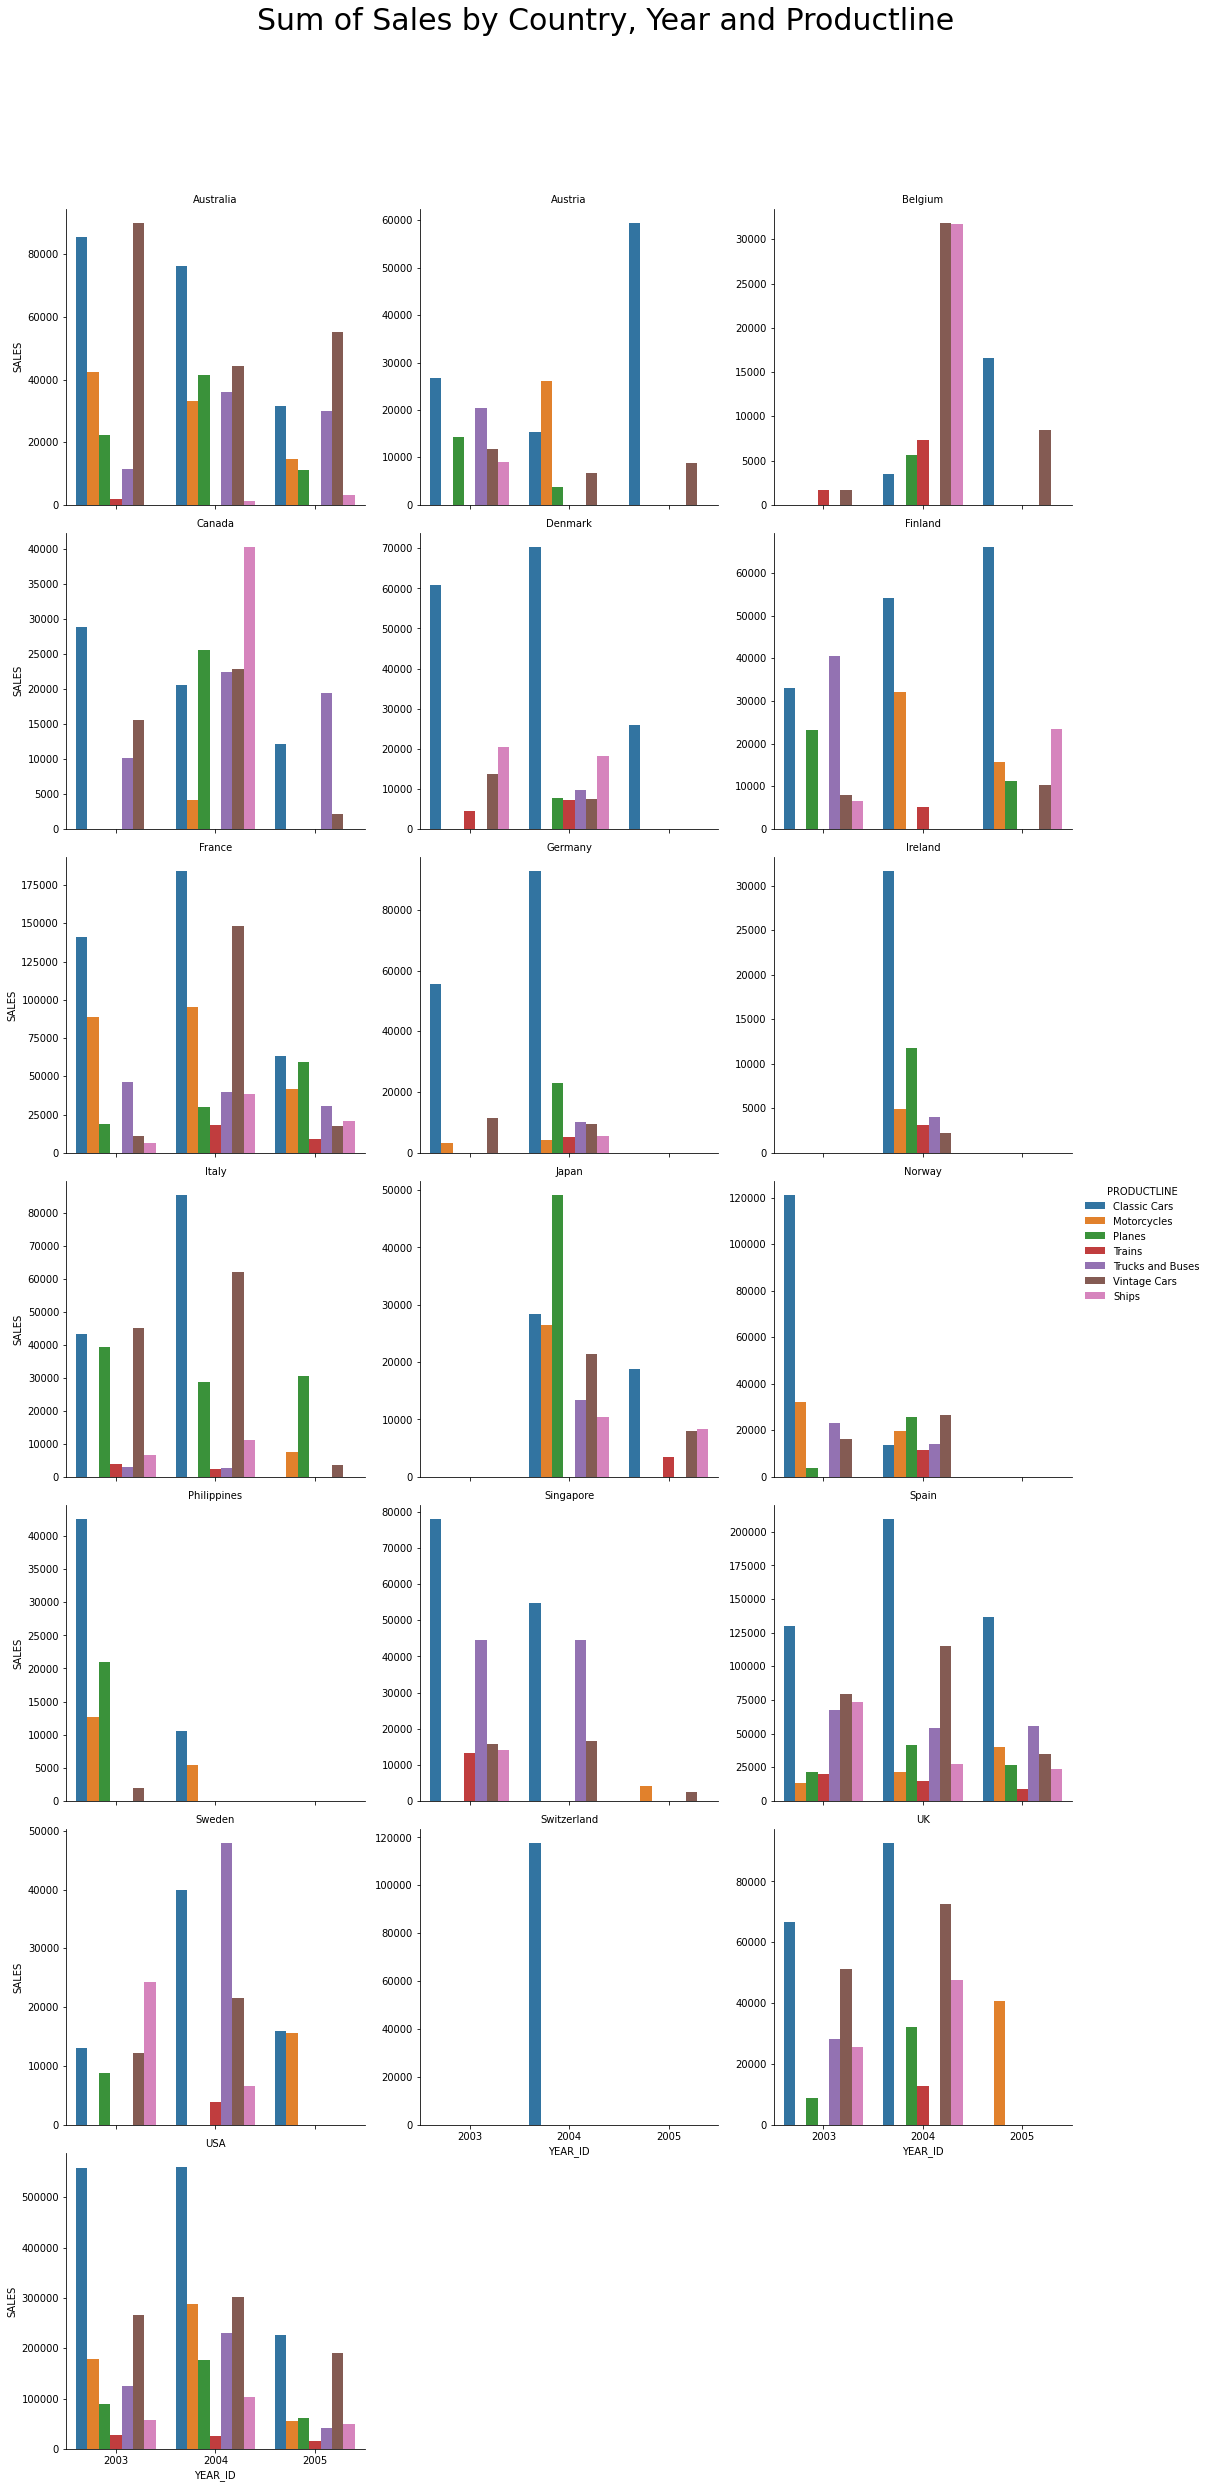

In [24]:
bp = sns.catplot(data=df3, x="YEAR_ID", y="SALES", col="COUNTRY", col_wrap=3, kind='bar', hue='PRODUCTLINE', height=5, sharey=False)

bp.set_titles("{col_name}")
bp.fig.suptitle('Sum of Sales by Country, Year and Productline', fontsize=30)
plt.subplots_adjust(top=0.9)

The visualisation doesn't look good. \
- I don't know where one year ends and the next year begins.\
    That is a problem.\
    We will fix that by a trick.\
    We will add __"sharex=False"__

- There is no space between the subplots, we will add: \
plt.subplots_adjust(hspace=0.4, wspace=0.4


For changing x and y label, we will put it in a function: \
By changing the variable fontticksize number, \
we change both the x and y label


fontticksize=13 \
for i, ax in enumerate(bp.axes):   \
....ax.set_xlabel('') # set x label \
....for tick in ax.xaxis.get_ticklabels(): \
........tick.set_fontsize(fontticksize) \
........tick.set_fontweight('bold') \
....for tick in ax.yaxis.get_ticklabels(): \
........tick.set_fontsize(fontticksize) \
........tick.set(rotation=0) \
........tick.set_fontweight('bold') \

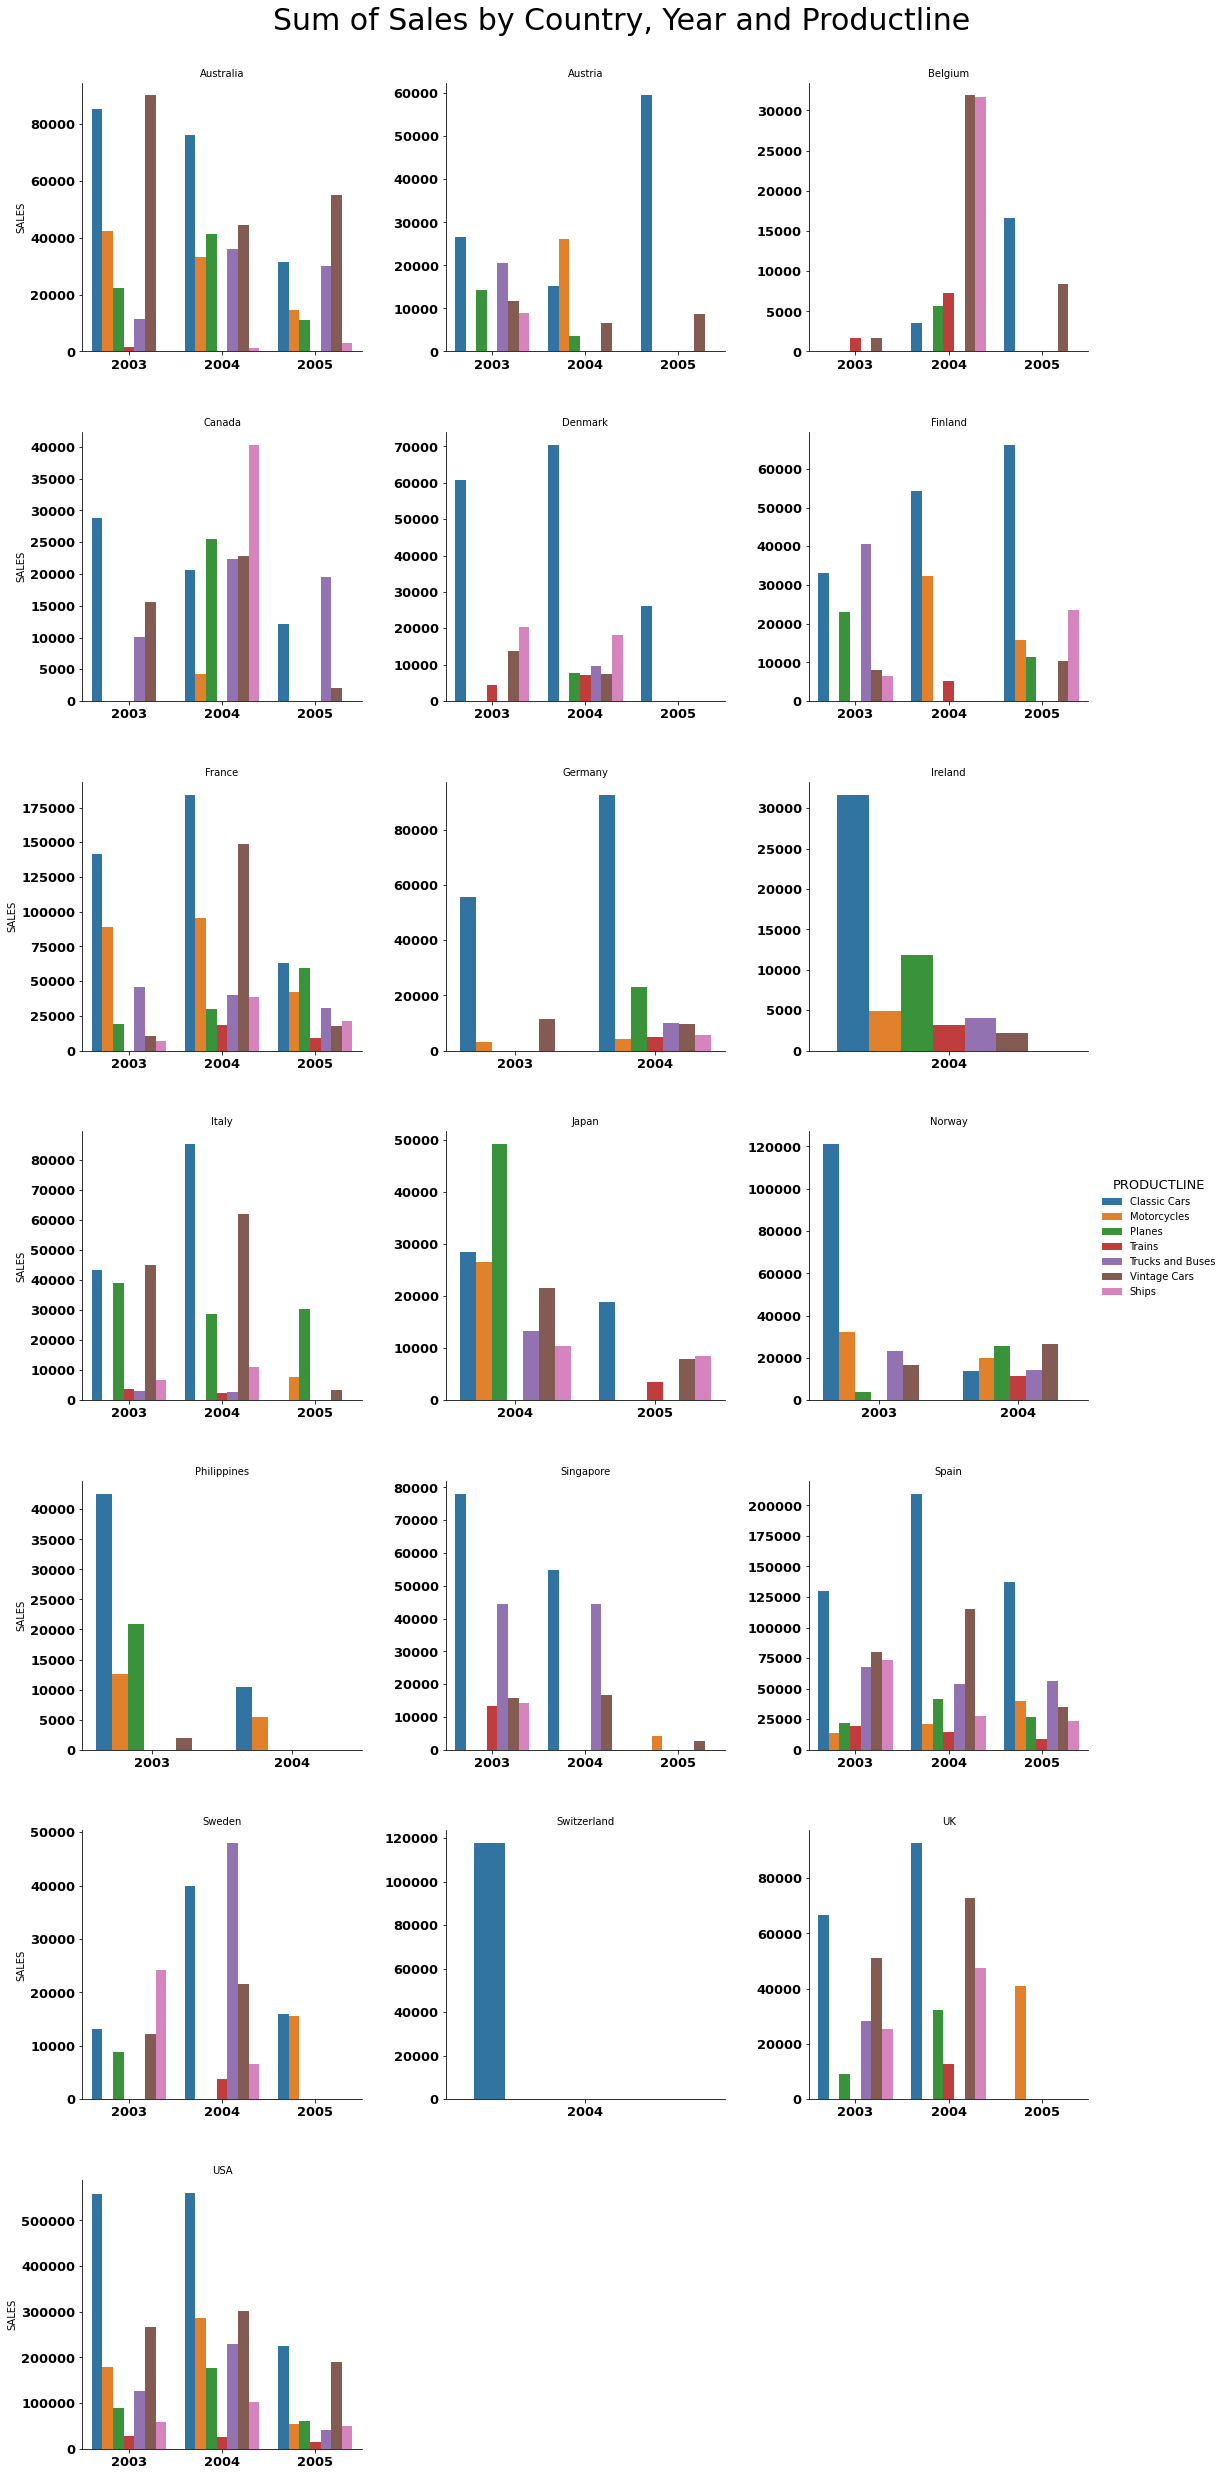

In [25]:
bp = sns.catplot(data=df3, x="YEAR_ID", y="SALES", col="COUNTRY", col_wrap=3, kind='bar', hue='PRODUCTLINE', height=5, sharey=False, sharex=False)

bp.set_titles("{col_name}", fontsize=10)
bp.fig.suptitle('Sum of Sales by Country, Year and Productline', fontsize=30)
plt.subplots_adjust(top=0.95, hspace=0.3, wspace=0.3)
fontticksize=13
plt.setp(bp._legend.get_title(), fontsize=13)

for i, ax in enumerate(bp.axes):   
    ax.set_xlabel('') # set x label
    for tick in ax.xaxis.get_ticklabels():
        tick.set_fontsize(fontticksize)
        tick.set_fontweight('bold')
    for tick in ax.yaxis.get_ticklabels():
        tick.set_fontsize(fontticksize)
        tick.set(rotation=0)
        tick.set_fontweight('bold')


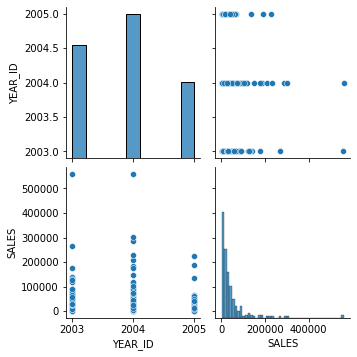

In [26]:
sns.pairplot(df3)